#  Análisis Exploratorio de Datos (EDA)

Este notebook explora el dataset limpio (`clean_movies.csv`) generado en la etapa anterior. Se enfoca en entender la distribución de las descripciones de películas (`overview`) y otras variables clave.

Pasos:
- Verificación del tamaño del dataset y columnas
- Visualización de longitud de sinopsis
- Revisión de valores faltantes
- Estadísticas descriptivas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

# Cargar el dataset limpio
df = pd.read_csv("../data/clean_movies.csv")
df.head()


,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Longitud de las sinopsis

Para analizar la calidad de las descripciones de las películas, se crea una columna `overview_word_count` que indica cuántas palabras contiene cada sinopsis. Esto nos permite:

- Detectar descripciones demasiado cortas o extensas.
- Evaluar si son suficientes para  el motor de recomendación.


In [2]:
# Crear una columna con la cantidad de palabras en cada sinopsis
df['overview_word_count'] = df['overview'].apply(lambda x: len(str(x).split()))

# Mostrar resumen estadístico
df['overview_word_count'].describe()


count    4806.000000
mean       52.183104
std        27.906977
min         0.000000
25%        30.000000
50%        48.000000
75%        67.000000
max       175.000000
Name: overview_word_count, dtype: float64

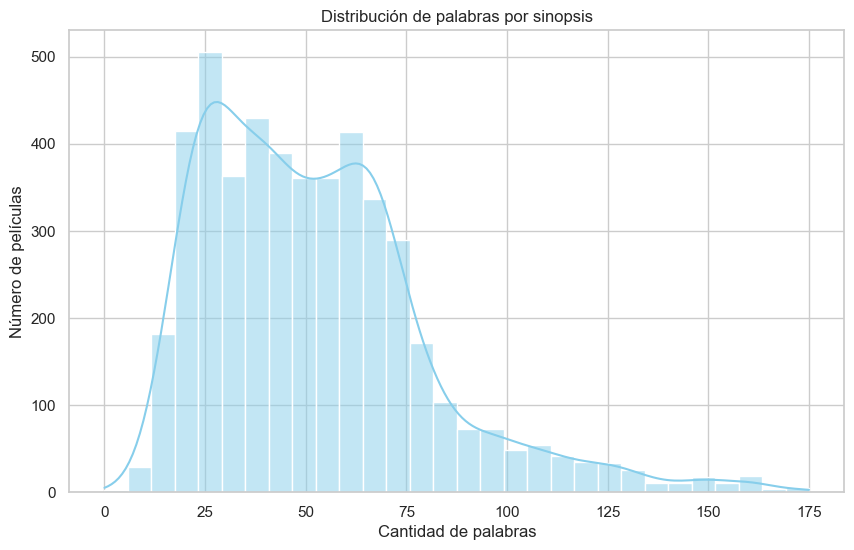

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(df['overview_word_count'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de palabras por sinopsis")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Número de películas")
plt.show()

#Visualización de longitud de sinopsis

El histograma muestra que la mayoría de las sinopsis tienen entre 50 y 150 palabras, lo que indica que son lo suficientemente descriptivas para extraer información relevante con TF-IDF.


In [4]:
# Revisión de datos nulos por columna
df.isnull().sum()


title                  0
overview               0
genres                 0
keywords               0
cast                   0
crew                   0
overview_word_count    0
dtype: int64

In [5]:
#Generos mas frecuentes
import ast

# Convertir string de lista a lista real
df['genres_list'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])

# Aplanar todas las listas de géneros
from collections import Counter

all_genres = [genre for sublist in df['genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Mostrar los más comunes
pd.DataFrame(genre_counts.most_common(10), columns=['Género', 'Frecuencia'])


,Género,Frecuencia
0,Drama,2299
1,Comedy,1723
2,Thriller,1275
3,Action,1156
4,Romance,895
5,Adventure,792
6,Crime,697
7,Science Fiction,538
8,Horror,520
9,Family,514




- La mayoría de las sinopsis tienen entre 50 y 150 palabras.
- No hay valores nulos significativos en las columnas seleccionadas.
- Los géneros más frecuentes incluyen Drama, Comedy y Action.

